# Projections

This script helps to practice the projection to 2D. Broadly speaking, people use two systems in spatial projection: lat/lon and meters. More specifically, the coordinate systems are adapted for different local areas. Researchers need to use the projection consistently, and choose the best projection for their own purposes. 

In [32]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.9.0
access                             1.1.2
affine                             2.3.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.7
anaconda-project                   0.8.3
arrow                              0.15.7
arviz                              0.6.1
asn1crypto                         1.3.0
astor                              0.8.1
astroid                            2.3.3
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.os                       0.1.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                 

spyder                             3.3.6
spyder-kernels                     0.5.2
SQLAlchemy                         1.3.18
statsmodels                        0.11.1
subprocess32                       3.5.4
sympy                              1.6
tables                             3.6.1
tabulate                           0.8.6
tblib                              1.6.0
tensorboard                        1.15.0
tensorflow-estimator               1.15.1
tensorflow-gpu                     1.15.0
termcolor                          1.1.0
terminado                          0.8.3
testpath                           0.4.4
Theano                             1.0.4
threadpoolctl                      2.1.0
tobler                             0.4.0
toolz                              0.10.0
torch                              1.4.0
torchvision                        0.5.0
tornado                            6.0.4
tqdm                               4.47.0
traitlets                          4.3.3
typing-exte

In [14]:
import geopandas as gpd 
import geoplot 
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [9]:
gdf = gpd.read_file("./data_shenhao/texas/texas.shp")

In [11]:
# show current projection.
# EPSG:4326; ellipsoidal coordinate with lat and long.
# WGS84 is standard for GPS using a reference ellipsoid.
# Check info here: https://epsg.io/4326
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
gdf['geometry'] # lat and lon as units.

0      POLYGON ((-100.00687 36.49388, -100.00114 36.4...
1      POLYGON ((-102.16757 36.05463, -102.16522 36.4...
2      POLYGON ((-102.16757 36.05463, -103.02356 36.0...
3      POLYGON ((-101.61950 36.05471, -101.62032 36.4...
4      POLYGON ((-101.08231 36.05626, -101.08967 36.4...
                             ...                        
249    MULTIPOLYGON (((-97.96375 26.61275, -97.99151 ...
250    POLYGON ((-98.59997 26.26045, -98.67792 26.242...
251    POLYGON ((-98.59997 26.26045, -98.34128 26.787...
252    MULTIPOLYGON (((-97.86896 26.34835, -97.87361 ...
253    MULTIPOLYGON (((-97.25125 26.41930, -97.23211 ...
Name: geometry, Length: 254, dtype: geometry

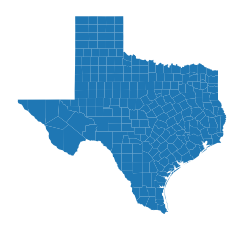

In [15]:
# vis
ax = gdf.plot()
ax.set_axis_off()
plt.show()

In [16]:
# projection 1 
gdf_proj_1 = gdf.to_crs("epsg:3879")
# gdf_proj_1 = gdf.to_crs(epsg=3879)

In [17]:
gdf_proj_1.crs
# info: https://epsg.io/3879
# sw: projection to a small area in Finland. 

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - 24.5°E to 25.5°E onshore nominal
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

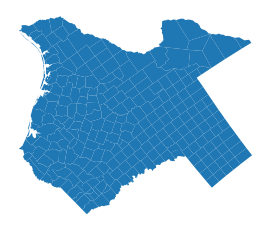

In [25]:
# vis
ax = gdf_proj_1.plot()
ax.set_axis_off()
plt.show()
# sw: Nice. The projection that fits Finland makes Texas look horrible. 

In [26]:
# projection 2
gdf_proj_2 = gdf.to_crs("epsg:26916") # For US projection

In [27]:
gdf_proj_2.crs
# UTM: Universal Transverse Mercator
# Note that is uses meters for E and N (not longitude and latitude) 

<Projected CRS: EPSG:26916>
Name: NAD83 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 90°W to 84°W and NAD83 by country
- bounds: (-90.0, 23.97, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
gdf_proj_2['geometry'] # sw: meters as units?

0      POLYGON ((-667829.483 4118356.514, -667334.059...
1      POLYGON ((-870913.945 4098278.937, -862871.991...
2      POLYGON ((-870913.945 4098278.937, -948833.552...
3      POLYGON ((-821051.191 4090481.827, -813566.942...
4      POLYGON ((-772188.478 4083300.353, -765681.327...
                             ...                        
249    MULTIPOLYGON (((-595492.303 2990877.783, -5982...
250    POLYGON ((-663181.962 2957100.631, -671253.014...
251    POLYGON ((-663181.962 2957100.631, -631745.201...
252    MULTIPOLYGON (((-588486.656 2960449.692, -5880...
253    MULTIPOLYGON (((-525573.370 2963231.402, -5236...
Name: geometry, Length: 254, dtype: geometry

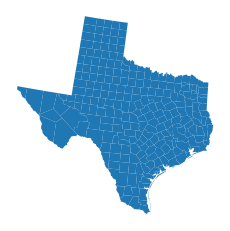

In [31]:
# vis
ax = gdf_proj_2.plot()
ax.set_axis_off()
plt.show()
# sw: small rotations exists, Hmm.